# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

## section 1: derivatives

In [13]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


In [14]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

from math import sin, cos

def gradf(a, b, c):
    # f(a+h)-f(a) / h
    # f(a+h,b,c) = s_a
    # f(a,b+h,c) = s_b
    # f(a,b,c+h) = s_c
    # f(a) = s
    # df_da = -3*a**2 - 0.5*a**(-0.5)
    # df_db = 3*cos(3*b) + 2.5*b**(1.5)
    # df_dc = 1/c**2


  s = f(a, b, c)
  h = 0.000001

  aprim = a+h
  s_a = f(aprim,b,c)
  df_da = ((s_a) - s)/ h

  bprim = b+h
  s_b = f(a,bprim,c)
  df_db = ((s_b) - s)/ h

  cprim = c+h
  s_c = f(a,b,cprim)
  df_dc = ((s_c) - s)/ h

  return [df_da, df_db, df_dc]


  # return [0, 0, 0] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


In [18]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell
a=2
b=3
c=4
# -----------
# -----------
df_da = -3 * a**2 - 0.5 * a ** (-0.5)
df_db = 3 * cos(3*b) + 2.5 * b**1.5
df_dc = c ** (-2)
numerical_grad = [df_da, df_db, df_dc] # TODO

# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")

yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [20]:
# there is an alternative formula that provides a much better numerical
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

# -----------
numerical_grad2 = [0, 0, 0] # TODO
# -----------
def numerical_gradf2(a, b, c, h=1e-5):
    df_da = (f(a + h, b, c) - f(a - h, b, c)) / (2 * h)
    df_db = (f(a, b + h, c) - f(a, b - h, c)) / (2 * h)
    df_dc = (f(a, b, c + h) - f(a, b, c - h)) / (2 * h)
    return [df_da, df_db, df_dc]
h = 0.000001
numerical_grad2 = gradf(2, 3, 4)

ans = [-12.353553390593273, 10.25699027111255, 0.0625]
for dim in range(3):
    ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


## section 2: support for softmax

In [44]:
from math import sin, cos
import math

# Value class starter code, with many functions taken out
from math import exp, log
import numpy as np
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other) :
     #print(self.data,'self')
     #print(other.data,'other')
     other = other if isinstance(other, Value) else Value(other)
     out = Value(self.data * other.data, (self, other), '*')

     def _backward():
        self.grad += other.data * out.grad
        other.grad += self.data * out.grad
     out._backward = _backward
     return out


  def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

  def log(self):
    out = Value(log(self.data), (self,), 'log')

    def _backward():
      self.grad += (1/self.data) * out.grad
    out._backward = _backward
    return out

  def __truediv__(self, other):
    other = Value(other) if not isinstance(other, Value) else other
    return self * other**-1

  def __rtruediv__(self, other): # other / self
    return other * self**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other


  def __rmul__(self,other):
    return self * other

  def exp(self):
    x = self.data
    out = Value(exp(x), (self,) , 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (exp(2*x) - 1)/(exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out


  def backward(self): # exactly as in video

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [45]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [46]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


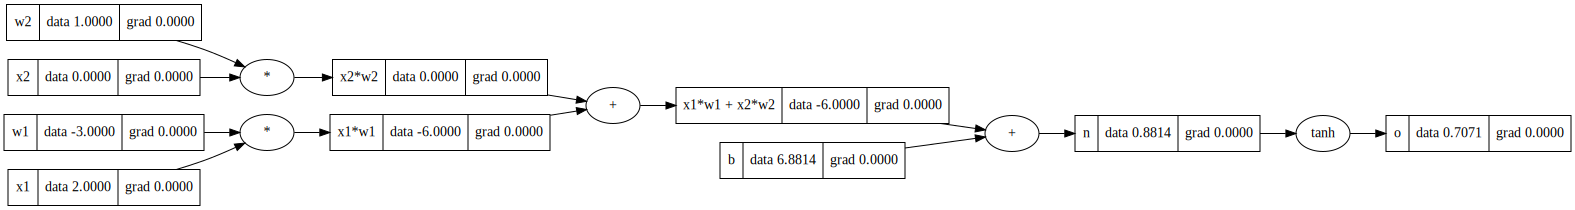

In [47]:
draw_dot(o)

In [48]:
# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")


2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


In [50]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch



# Define the function f using PyTorch operations
def f_torch(a, b, c):
    return -a**3 + torch.sin(3*b) - 1.0/c + b**2.5 - a**0.5

# Define the inputs
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = torch.tensor(4.0, requires_grad=True)

# Compute the function value
result = f_torch(a, b, c)

# Compute gradients
result.backward()

# Print the gradients
print(f"Gradient with respect to a: {a.grad.item()}")
print(f"Gradient with respect to b: {b.grad.item()}")
print(f"Gradient with respect to c: {c.grad.item()}")




Gradient with respect to a: -12.353553771972656
Gradient with respect to b: 10.256989479064941
Gradient with respect to c: 0.0625
